In [ ]:
!pip install --upgrade pip
!pip install --upgrade Pillow
!pip install wordcloud

In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import data

In [3]:
# read the csv files
listings_df = pd.read_csv("C:/Users/HP/Downloads/Airbnb/listings_detail.csv")
review_df = pd.read_csv("C:/Users/HP/Downloads/Airbnb/reviews_detail.csv")
calender_df = pd.read_csv("C:/Users/HP/Downloads/Airbnb/calendar_detail.csv")

In [22]:
len(listings_df)

6998

In [6]:
list_col= listings_df.columns.to_list()
list_col

['id',
 'name',
 'host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checki

### Data pre-processing

#### Change the datatype and format of price column

In [5]:
listings_df["price"].head(2)

0     $69.00
1    $325.00
Name: price, dtype: object

In [7]:
# To remove the $ from price and convert to integer datatype

listings_df['price'] = listings_df['price'].str.replace('$', '').str.replace(',', '')

listings_df['price'] = listings_df['price'].astype(float).round().astype(int)


<ipython-input-7-55a0f2fa9fe4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listings_df['price'] = listings_df['price'].str.replace('$', '').str.replace(',', '')


In [8]:
listings_df["price"].head(2)

0     69
1    325
Name: price, dtype: int32

In [9]:
print(listings_df.describe())

                 id       host_id  host_listings_count  \
count  6.998000e+03  6.998000e+03          6998.000000   
mean   1.868009e+17  1.001616e+08             2.480280   
std    3.138391e+17  1.356648e+08            12.798773   
min    2.818000e+03  3.159000e+03             1.000000   
25%    1.578534e+07  9.506638e+06             1.000000   
50%    3.534389e+07  3.403882e+07             1.000000   
75%    5.820000e+17  1.354875e+08             2.000000   
max    8.430000e+17  5.044487e+08           522.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                6998.000000  6998.000000  6998.000000   6998.000000   
mean                    4.438983    52.366767     4.890218      2.908260   
std                    26.261102     0.017055     0.035085      1.387231   
min                     1.000000    52.290340     4.755710      0.000000   
25%                     1.000000    52.355979     4.866687      2.000000   
50%                  

#### Drop the unncessary columns

In [10]:
# Drop review_score_accuracy column which no column description
listings_df_cleaned=listings_df.drop(['review_scores_accuracy'],axis=1)
listings_df_cleaned

,id,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,2.818000e+03,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,24-09-2008,"Amsterdam, Netherlands",within an hour,100%,100%,t,...,28-02-2023,4.89,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1.90
1,3.111240e+05,*historic centre* *bright* *canal view* *jordaan*,1600010,Anke & Robert,12-01-2012,"Amsterdam, Netherlands",within a few hours,100%,68%,f,...,01-01-2023,4.76,4.79,4.90,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,0.66
2,3.199850e+05,Elegant Appartement Central Location.,1640702,J,23-01-2012,"Amsterdam, Netherlands",within a day,93%,89%,t,...,21-02-2023,4.75,4.69,4.86,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,3.73
3,3.272850e+05,beautiful designed ap.+bikes+garden,1672823,Ester,30-01-2012,"Amsterdam, Netherlands",within an hour,100%,100%,f,...,04-03-2023,4.94,4.92,4.98,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,4.19
4,3.319460e+05,Lovely FAMILY house near Vondelpark,1687595,Sebastiaan,02-02-2012,"Amsterdam, Netherlands",NaN,NaN,NaN,f,...,21-07-2019,4.88,4.64,4.92,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,8.420000e+17,Flat in the center of Amsterdam,47205615,Edgar,22-10-2015,"Amsterdam, Netherlands",NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363 80A2 E913 8FAD A98A,f,NaN
6994,8.420000e+17,3bed ark close to city centre,454835217,Barbara,18-04-2022,NaN,NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363 B755 6BD8 6F8D AA7F,t,NaN
6995,8.430000e+17,ground floor studio 46m2 at boulevard & canal,504448710,Ivanka,08-03-2023,NaN,NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363 76A0 B46B 281A C38E,f,NaN
6996,8.430000e+17,Oasis in trendy Amsterdam East,17537276,Thomas,02-07-2014,"Amsterdam, Netherlands",NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363 97C2 71FF 5383 DC95,f,NaN


#### Identify duplicate listing IDs and remove them to avoid inconsisitencies

In [11]:
duplicate_ids = listings_df_cleaned[listings_df_cleaned.duplicated(subset='id', keep=False)]['id'].unique()
listings_df_cleaned = listings_df_cleaned[~listings_df_cleaned['id'].isin(duplicate_ids)]
listings_df_cleaned

,id,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,2.818000e+03,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,24-09-2008,"Amsterdam, Netherlands",within an hour,100%,100%,t,...,28-02-2023,4.89,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1.90
1,3.111240e+05,*historic centre* *bright* *canal view* *jordaan*,1600010,Anke & Robert,12-01-2012,"Amsterdam, Netherlands",within a few hours,100%,68%,f,...,01-01-2023,4.76,4.79,4.90,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,0.66
2,3.199850e+05,Elegant Appartement Central Location.,1640702,J,23-01-2012,"Amsterdam, Netherlands",within a day,93%,89%,t,...,21-02-2023,4.75,4.69,4.86,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,3.73
3,3.272850e+05,beautiful designed ap.+bikes+garden,1672823,Ester,30-01-2012,"Amsterdam, Netherlands",within an hour,100%,100%,f,...,04-03-2023,4.94,4.92,4.98,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,4.19
4,3.319460e+05,Lovely FAMILY house near Vondelpark,1687595,Sebastiaan,02-02-2012,"Amsterdam, Netherlands",NaN,NaN,NaN,f,...,21-07-2019,4.88,4.64,4.92,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,7.940000e+17,Stylish 1 bedroom apartment+garden - NEW Listing,307832522,Marcus,07-11-2019,"Amsterdam, Netherlands",within an hour,100%,100%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363834B629050C32580,f,NaN
6720,7.970000e+17,Lovely apartment in city centre,62378155,Pien,10-03-2016,"Amsterdam, Netherlands",within an hour,100%,86%,f,...,20-02-2023,5.00,4.67,5.00,4.67,5.00,4.33,0363 8575 C755 4B7C 3AF0,f,3.00
6745,1.784659e+07,Spacious 92m apartment with balcony,9439980,Marcel,15-10-2013,"Amsterdam, Netherlands",within an hour,100%,60%,f,...,12-12-2022,4.93,5.00,5.00,4.87,4.47,4.80,0363 C6E4 D5CF BFEB 45A8,f,0.32
6887,8.230000e+17,Cozy apartment in the Oude Pijp,40693236,Milan,06-08-2015,"Amsterdam, Netherlands",within a day,100%,75%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363 7E85 4336 2115 B805,f,NaN


#### Drop the rows with price per night equal to zero

In [12]:
listings_df_cleaned = listings_df_cleaned[listings_df_cleaned['price'] != 0]

#### Outlier detection

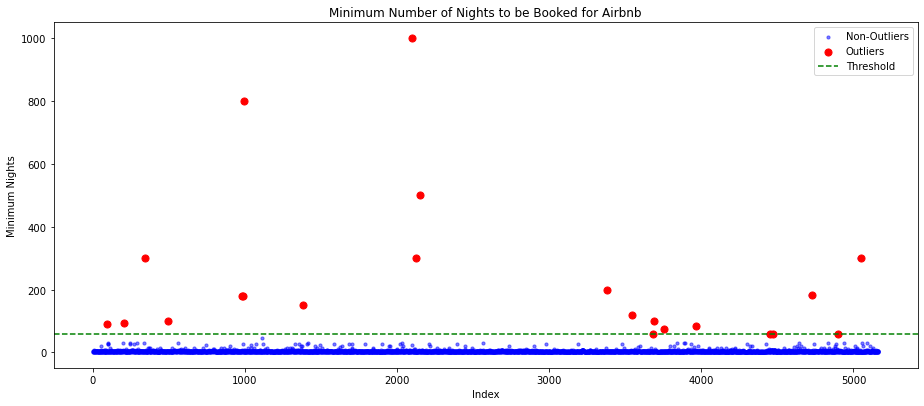

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the z-score for each value in the 'minimum_nights' column
z_scores = np.abs((listings_df_cleaned['minimum_nights'] - listings_df_cleaned['minimum_nights'].mean()) / listings_df_cleaned['minimum_nights'].std())

# Define a threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 3

# Identify outliers based on the threshold
outliers = listings_df_cleaned[z_scores > threshold]

# Get the lowest value among the outliers
lowest_outlier = outliers['minimum_nights'].min()

# Increase the size of the plot
plt.figure(figsize=(15, 6))

# Create the scatter plot
colors = np.where(z_scores > threshold, 'red', 'blue')
non_outliers = plt.scatter(range(len(listings_df_cleaned)), listings_df_cleaned['minimum_nights'], s=10, c='blue', alpha=0.5, label='Non-Outliers')
outlier_dots = plt.scatter(outliers.index, outliers['minimum_nights'], s=50, c='red', label='Outliers')
threshold_line = plt.axhline(y=lowest_outlier, color='green', linestyle='--', label='Threshold')

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Minimum Nights')
plt.title('Minimum Number of Nights to be Booked for Airbnb')

# Customize the legend
plt.legend(handles=[non_outliers, outlier_dots, threshold_line], loc='upper right')

# Adjust the spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

In [14]:
# Retrieve and drop the indices of the outliers
outlier_indices = outliers.index
cleaned_df = listings_df_cleaned.drop(outlier_indices)
cleaned_df

,id,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,2.818000e+03,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,24-09-2008,"Amsterdam, Netherlands",within an hour,100%,100%,t,...,28-02-2023,4.89,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1.90
1,3.111240e+05,*historic centre* *bright* *canal view* *jordaan*,1600010,Anke & Robert,12-01-2012,"Amsterdam, Netherlands",within a few hours,100%,68%,f,...,01-01-2023,4.76,4.79,4.90,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,0.66
2,3.199850e+05,Elegant Appartement Central Location.,1640702,J,23-01-2012,"Amsterdam, Netherlands",within a day,93%,89%,t,...,21-02-2023,4.75,4.69,4.86,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,3.73
3,3.272850e+05,beautiful designed ap.+bikes+garden,1672823,Ester,30-01-2012,"Amsterdam, Netherlands",within an hour,100%,100%,f,...,04-03-2023,4.94,4.92,4.98,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,4.19
4,3.319460e+05,Lovely FAMILY house near Vondelpark,1687595,Sebastiaan,02-02-2012,"Amsterdam, Netherlands",NaN,NaN,NaN,f,...,21-07-2019,4.88,4.64,4.92,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,7.940000e+17,Stylish 1 bedroom apartment+garden - NEW Listing,307832522,Marcus,07-11-2019,"Amsterdam, Netherlands",within an hour,100%,100%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363834B629050C32580,f,NaN
6720,7.970000e+17,Lovely apartment in city centre,62378155,Pien,10-03-2016,"Amsterdam, Netherlands",within an hour,100%,86%,f,...,20-02-2023,5.00,4.67,5.00,4.67,5.00,4.33,0363 8575 C755 4B7C 3AF0,f,3.00
6745,1.784659e+07,Spacious 92m apartment with balcony,9439980,Marcel,15-10-2013,"Amsterdam, Netherlands",within an hour,100%,60%,f,...,12-12-2022,4.93,5.00,5.00,4.87,4.47,4.80,0363 C6E4 D5CF BFEB 45A8,f,0.32
6887,8.230000e+17,Cozy apartment in the Oude Pijp,40693236,Milan,06-08-2015,"Amsterdam, Netherlands",within a day,100%,75%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0363 7E85 4336 2115 B805,f,NaN


In [15]:
cleaned_df.to_csv("C:/Users/HP/Downloads/Airbnb/listings_cleaned.csv", index=False)

### Data Analysis

#### Price distribution per neighbourhood

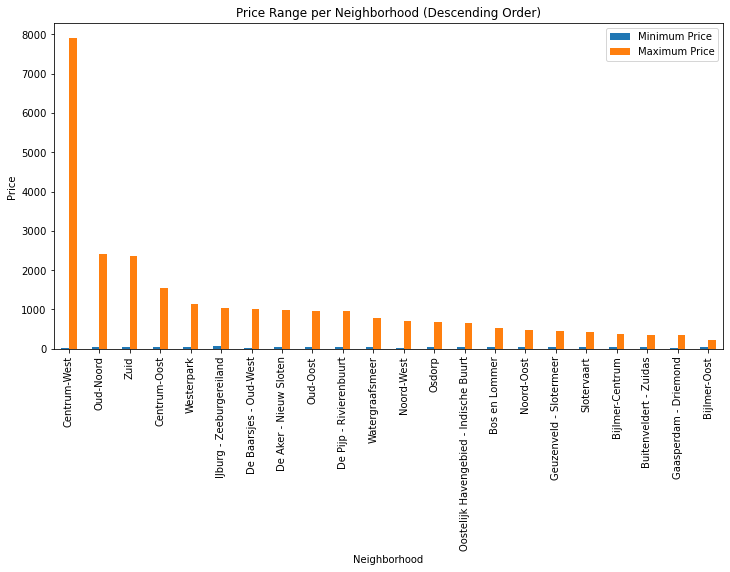

In [16]:
# Group the data by neighborhood and find the price range
price_range_per_neighborhood = cleaned_df.groupby('neighbourhood_cleansed')['price'].agg(['min', 'max'])

# Sort the DataFrame in descending order by maximum price
price_range_per_neighborhood = price_range_per_neighborhood.sort_values('max', ascending=False)

# Plotting the price range per neighborhood
ax = price_range_per_neighborhood.plot(kind='bar', figsize=(12, 6))
ax.set_title('Price Range per Neighborhood (Descending Order)')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price')
ax.legend(['Minimum Price', 'Maximum Price'])
plt.show()


#### Price Distribution

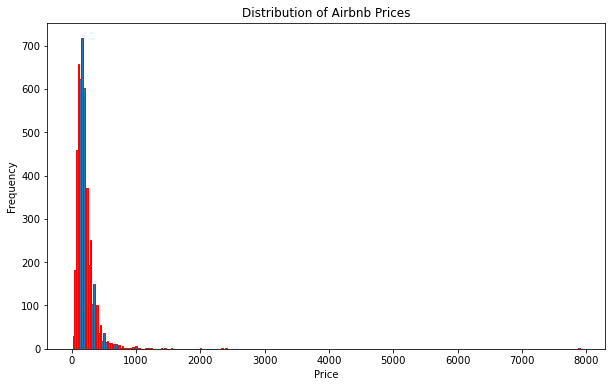

In [17]:
# Create a histogram of the price distribution
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['price'], bins=300, edgecolor='red')

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices')

# Show the plot
plt.show()

#### Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


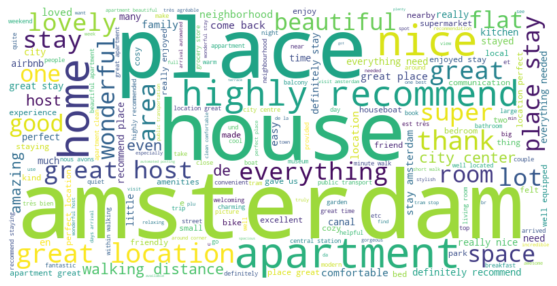

In [19]:
from wordcloud import WordCloud
# Filter positive reviews based on review_scores_rating from listings_detail.csv
positive_reviews = review_df.merge(cleaned_df[['id', 'review_scores_rating']], left_on='listing_id', right_on='id')
positive_reviews = positive_reviews[(positive_reviews['review_scores_rating'] == 4) | (positive_reviews['review_scores_rating'] == 5)]

# Preprocess the comments
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

positive_reviews['comments_preprocessed'] = positive_reviews['comments'].apply(preprocess_text)

# Generate the word cloud
all_comments = ' '.join(positive_reviews['comments_preprocessed'])
# Get word frequencies
word_freq = Counter(all_comments.split())

# Get the top 20 most appeared words
top_30_words = word_freq.most_common(30)

# Save the top 20 words in a variable
top_30_words_list = [word for word, freq in top_30_words]
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
